In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#create a variable to store results of june temp query
june_temps =[]
#use the session query to get date and totals obs from measurement table and filter by the month of June
#use all() to extract those results to a list
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


In [5]:
#  3. Convert the June temperatures to a list.
june_temp_list = list(np.ravel(june_temps))


In [24]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns = ['date', 'June Temps'])
june_df.set_index(june_df['date'], inplace=True)


In [25]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


Text(0.5, 1.0, 'June Temps')

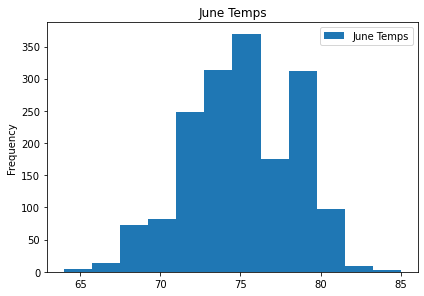

In [28]:
june_df.plot.hist(bins=12)
plt.tight_layout()
plt.title("June Temps")


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps =[]
december_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


In [10]:
# 7. Convert the December temperatures to a list.
december_temp_list = list(np.ravel(december_temps))


In [22]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_temps, columns = ['date', 'December Temps'])
december_df.set_index(december_df['date'], inplace=True)

In [23]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(0.5, 1.0, 'December Temps')

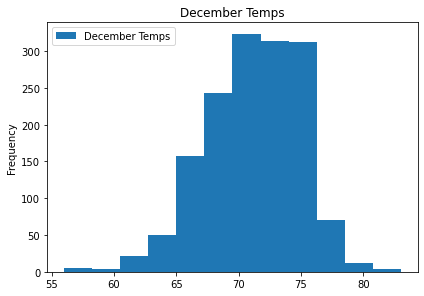

In [29]:
december_df.plot.hist(bins=12)
plt.tight_layout()
plt.title("December Temps")
